In [14]:
import pandas as pd

# File paths for the uploaded datasets
customers_file_path = "C://Users//ASUS//Downloads//Customers.csv"
products_file_path = "C://Users//ASUS//Downloads//Products.csv"
transactions_file_path = "C://Users//ASUS//Downloads//Transactions.csv"

# Load the datasets
customers = pd.read_csv(customers_file_path)
products = pd.read_csv(products_file_path)
transactions = pd.read_csv(transactions_file_path)

# Display basic information about each dataset
customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

# Display the first few rows of each dataset to understand their structure
customers_preview = customers.head()
products_preview = products.head()
transactions_preview = transactions.head()

(customers_info, products_info, transactions_info, customers_preview, products_preview, transactions_preview)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(None,
 None,
 None,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  20

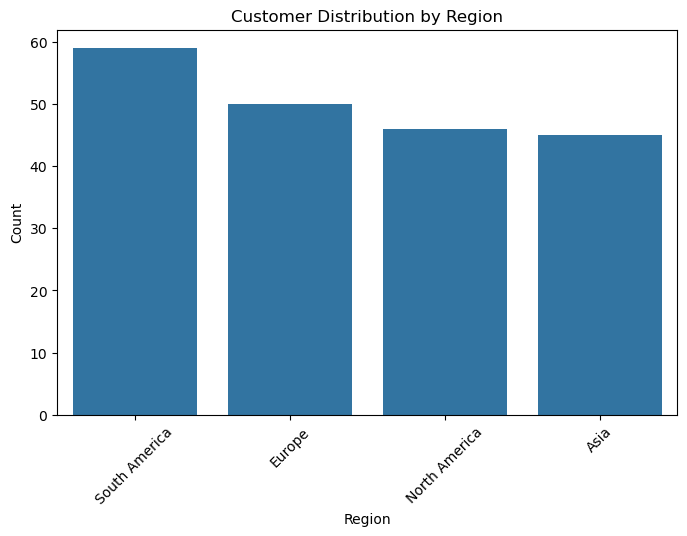

In [16]:
# Distribution of customers by region
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


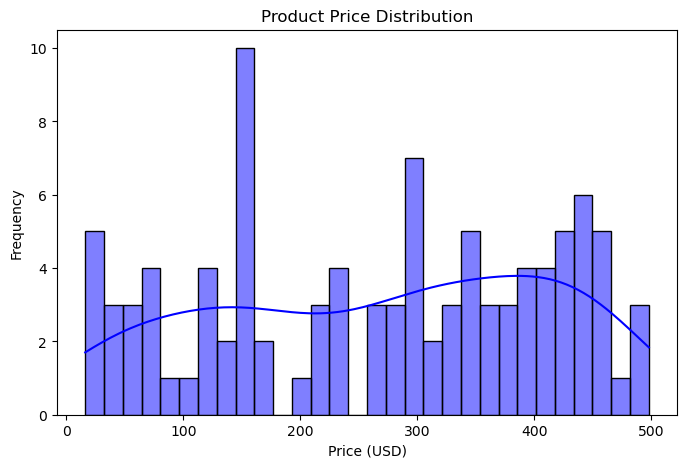

In [18]:
# Price distribution of products
plt.figure(figsize=(8, 5))
sns.histplot(data=products, x='Price', kde=True, bins=30, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17672\4266926693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='viridis')


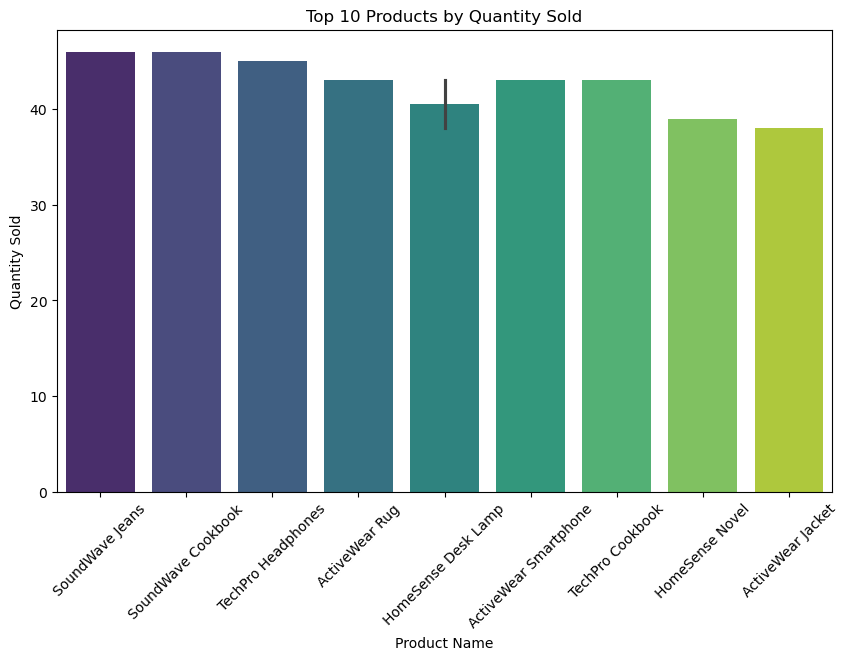

In [20]:
# Top 10 products by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


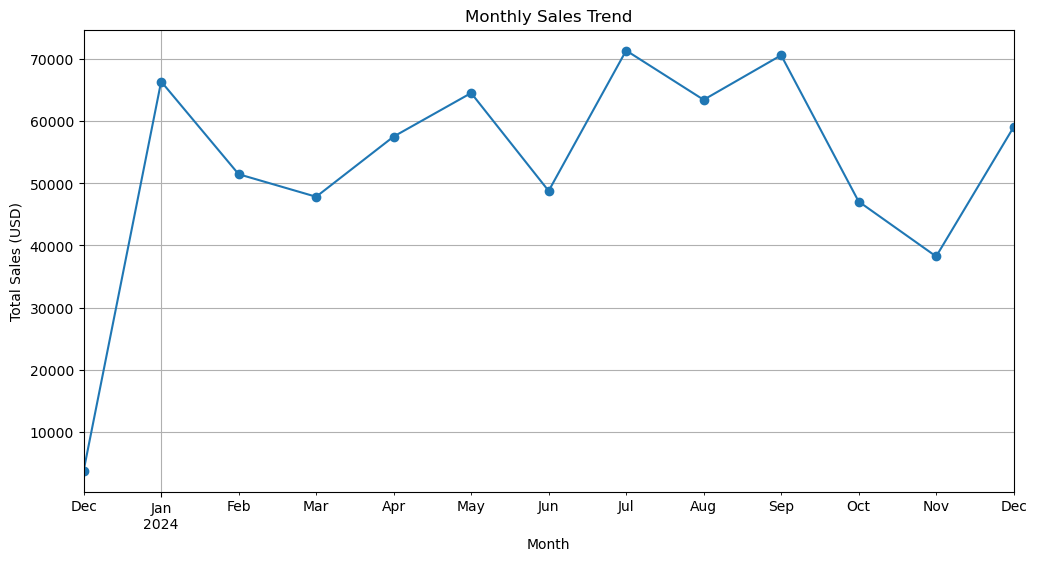

In [22]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

# Monthly total sales
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()


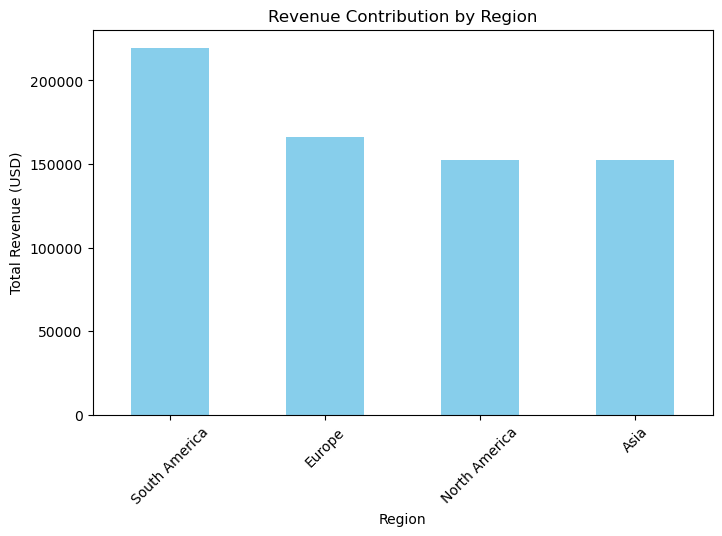

In [24]:
# Merge transactions with customers to get region-wise revenue
transactions_region = transactions.merge(customers, on='CustomerID', how='left')
region_revenue = transactions_region.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue Contribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()


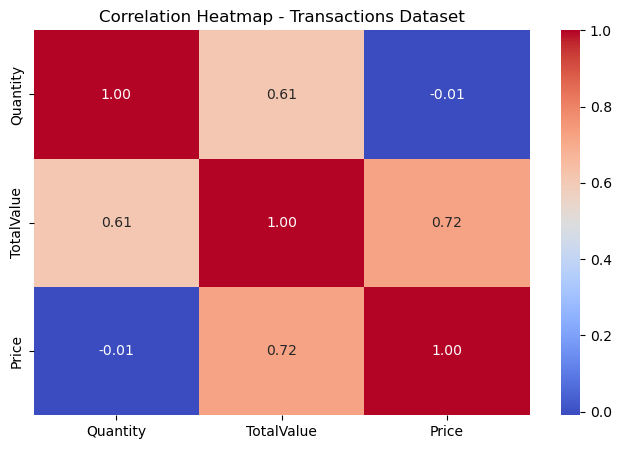

In [30]:
# Correlation heatmap for numerical fields in transactions
plt.figure(figsize=(8, 5))

# Select only numeric columns for correlation
numeric_columns = transactions.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap - Transactions Dataset')
plt.show()


